In [196]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [198]:
lebron1 = pd.read_csv("Lebron career stats.csv")
lebron2 = pd.read_csv("Lebron career stats advanced.csv")

In [200]:
lebron = pd.merge(lebron1,lebron2,on="Season",how = "left")

In [202]:
#Selecting the traditional stats
lebronstats = lebron[["Season","TRB","AST","STL","BLK","PTS","PER","OWS","DWS","WS","BPM","VORP"]]

In [204]:
#Ranking each specific stat by season
for col in lebronstats.columns[1:]:
    lebronstats.loc[:,f"{col}_rank"] = lebronstats[col].rank(ascending = False)

In [206]:
#Creating a separate dataframe of only ranking columns
lebronranked = lebronstats[["TRB_rank","AST_rank","STL_rank","BLK_rank","PTS_rank","PER_rank","OWS_rank","DWS_rank","WS_rank","BPM_rank","VORP_rank"]]

In [208]:
#Taking the average of each season's rankings
lebronranked.loc[:,"season_average"] = lebronranked.mean(axis=1)

In [210]:
#Ranking the averages to find the best season overall according to stats
#Note that this weights all the stats equally which of course is very subjective
lebronranked.loc[:,"overall_rank"] = lebronranked["season_average"].rank(ascending=True)

In [212]:
#Adding the seasons to the rows to make plots easier
n_seasons = len(lebronranked)
seasons = [f"{yr}-{str(yr+1)[-2:]}" for yr in range(2003, 2003 + n_seasons)]
lebronranked.loc[:,"season"] = seasons

In [214]:
#Prep for a bar chart with the seasons and their average ranking
shortlist = lebronranked[["season","season_average"]]
shortlist = shortlist.set_index("season")

Text(0, 0.5, 'Average of Ranks')

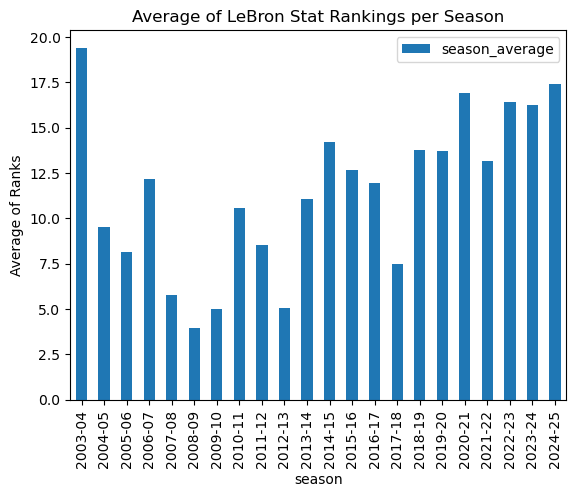

In [216]:
#Displaying all the seasons 
ax1 = shortlist.plot.bar()
ax1.set_title("Average of LeBron Stat Rankings per Season")
ax1.set_ylabel("Average of Ranks")

In [218]:
#Prepping for plot 2
top3 = ["2008-09","2009-10","2012-13"]
toplebronstats = lebronstats[lebronstats["Season"].isin(top3)]
toplebronstats = toplebronstats[["Season","TRB","AST","STL","BLK","PTS","PER","OWS","DWS","WS","BPM","VORP"]]
toplebronstats = toplebronstats.set_index("Season")

Text(0.5, 1.0, 'LeBron James Stats for Top 3 Seasons')

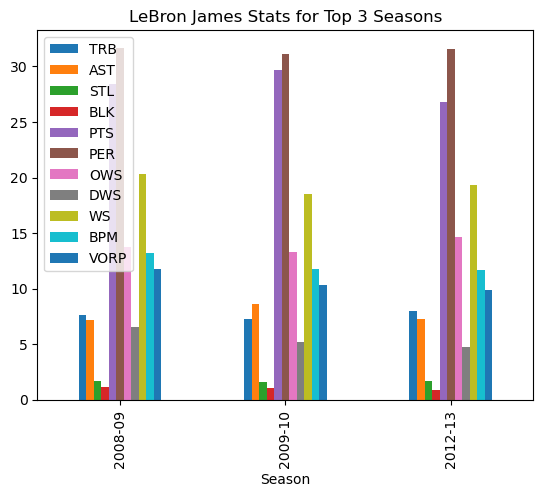

In [220]:
#Showing the statistics for the best three seasons: 08-09, 09-10, 12-13
ax2 = toplebronstats.plot.bar()
ax2.set_title("LeBron James Stats for Top 3 Seasons")